# Turbofan Engine - Data set: FD001
## Train, Predict and Evaluate: Linear Regression

In [1]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

import myFunctions as f

In [2]:
train, test, RUL = f.import_("train_FD001.txt", "test_FD001.txt", "RUL_FD001.txt")

In [3]:
def prepare_train(train, filter_, RUL_def, t):
    """ filter_ = median, kalman or None
        RUL_def = linear or clipped, if clipped, define t"""
    # drop columns
    train = f.drop_cols(train)
    
    # choose filter
    if filter_ == None:
        T = train
    elif filter_ == "median":
        T = f.apply_median_filter(train)
    elif filter_ == "kalman":
        T = pd.read_csv("data/kalman_train.csv")
    else:
        print("provide a valid filter (None, median or kalman)")
    
    # choose RUL definition 
    if RUL_def == "linear":
        T = f.linearRUL(T)
    elif RUL_def == "clipped":
        T = f.clipRUL(T, t)
    else:
        print("provide a valid RUL definition (linear or clipped)")
    
    y_train = T.iloc[:,0].values
    cols = T.columns[3::]
    X_train = T[cols]
    
    return y_train, X_train

def prepare_test(test, filter_):
    # drop columns
    X_test = f.drop_cols(test)
    
    # FILTER! DO NOT FORGET
    # choose filter
    if filter_ == None:
        T = X_test
    elif filter_ == "median":
        T = f.apply_median_filter(X_test)
    elif filter_ == "kalman":
        T = pd.read_csv("data/kalman_test.csv")

    # Select just the last row for every unit to match results on the RUL column
    X_test = X_test.groupby("unit_number").last().reset_index()[X_test.columns[2::]]
    return X_test

def evaluate(y_true, y_pred):
    # evaluation metrics
    MSE = mean_squared_error(y_true, y_pred)
    RMSE = np.sqrt(MSE)
    R2 = r2_score(y_true, y_pred)
    print("MSE", round(MSE,3))
    print("RMSE", round(RMSE,3))
    print("r2 score", round(R2,3))
    return MSE, RMSE, R2

In [4]:
# empty dataset to store the resutls
results = pd.DataFrame(columns=["Algo", "Filter", "RUL_def", "MSE", "RMSE", "R2"])
results

,Algo,Filter,RUL_def,MSE,RMSE,R2


## The Baseline Model
- No filter
- Linear RUL definition
- Linear Regression 

In [5]:
# prepare data
r = "linear"
fi = None
y_train, X_train = prepare_train(train, fi, r, t=0)
X_test = prepare_test(test, None)
y_true = RUL["RUL"].values

In [6]:
# fit the model
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [7]:
# predict
y_pred = lm.predict(X_test)

In [8]:
# evaluate
MSE, RMSE, R2 = evaluate(y_true, y_pred)
new_row = {"Algo": "LR", "Filter": str(fi) ,"RUL_def": r, "MSE": MSE, "RMSE": RMSE, "R2": R2}
results = results.append(new_row, ignore_index=True)

MSE 1020.971
RMSE 31.953
r2 score 0.409


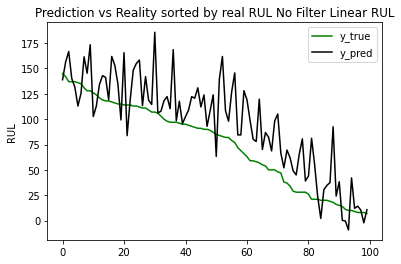

In [9]:
# plot prediction vs reality 2
d = {"units": range(1,101), "y_true": y_true, "y_pred": y_pred}
ev = pd.DataFrame(d)
ev = ev.sort_values(by = "y_true", ascending = False)
    
plt.plot(ev["y_true"].values, color = "g")
plt.plot(ev["y_pred"].values, color = "black")
plt.legend(["y_true", "y_pred"])
plt.ylabel("RUL")
plt.title("Prediction vs Reality sorted by real RUL No Filter Linear RUL")
plt.savefig("plots\LR_None_linear.png", bbox_inches = "tight")
plt.show()

## Filter effect

### Median filter

In [10]:
# prepare data
r = "linear"
fi = "median"
y_train, X_train = prepare_train(train, fi, r, t=0)
X_test = prepare_test(test, "median") 
y_true = RUL["RUL"].values

# fit the model
lm = LinearRegression()
lm.fit(X_train, y_train)

# predict
y_pred = lm.predict(X_test)

# evaluate
MSE, RMSE, R2 = evaluate(y_true, y_pred)
new_row = {"Algo": "LR", "Filter": fi , "RUL_def": r, "MSE": MSE, "RMSE": RMSE, "R2": R2}
results = results.append(new_row, ignore_index=True)

MSE 1461.635
RMSE 38.231
r2 score 0.154


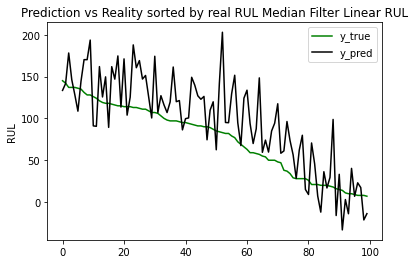

In [11]:
# plot prediction vs reality 2
d = {"units": range(1,101), "y_true": y_true, "y_pred": y_pred}
ev = pd.DataFrame(d)
ev = ev.sort_values(by = "y_true", ascending = False)
    
plt.plot(ev["y_true"].values, color = "g")
plt.plot(ev["y_pred"].values, color = "black")
plt.legend(["y_true", "y_pred"])
plt.ylabel("RUL")
plt.title("Prediction vs Reality sorted by real RUL Median Filter Linear RUL")
plt.savefig("plots\LR_medial_linear.png", bbox_inches = "tight")
plt.show()

### Kalman filter

In [12]:
# prepare data
r = "linear"
fi = "kalman"
y_train, X_train = prepare_train(train, fi, r, t=0)
X_test = prepare_test(test, "kalman") 
y_true = RUL["RUL"].values

# fit the model
lm = LinearRegression()
lm.fit(X_train, y_train)

# predict
y_pred = lm.predict(X_test)

# evaluate
MSE, RMSE, R2 = evaluate(y_true, y_pred)
new_row = {"Algo": "LR", "Filter": fi , "RUL_def": r, "MSE": MSE, "RMSE": RMSE, "R2": R2}
results = results.append(new_row, ignore_index=True)

MSE 1309.634
RMSE 36.189
r2 score 0.242


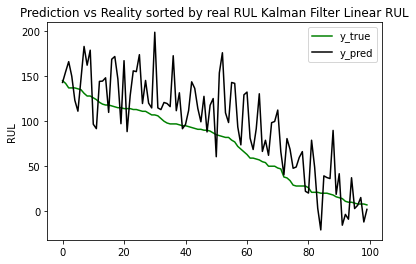

In [13]:
# plot prediction vs reality 2
d = {"units": range(1,101), "y_true": y_true, "y_pred": y_pred}
ev = pd.DataFrame(d)
ev = ev.sort_values(by = "y_true", ascending = False)
    
plt.plot(ev["y_true"].values, color = "g")
plt.plot(ev["y_pred"].values, color = "black")
plt.legend(["y_true", "y_pred"])
plt.ylabel("RUL")
plt.title("Prediction vs Reality sorted by real RUL Kalman Filter Linear RUL")
plt.savefig("plots\LR_"+str(fi)+"_"+str(r)+".png", bbox_inches = "tight")
plt.show()

## RUL definition
### Clipped RUL
#### No filter

In [14]:
# prepare data
r = "clipped"
fi = None
y_train, X_train = prepare_train(train, fi, r, t=125)
X_test = prepare_test(test, None) 
y_true = RUL["RUL"].values

# fit the model
lm = LinearRegression()
lm.fit(X_train, y_train)

# predict
y_pred = lm.predict(X_test)

# evaluate
MSE, RMSE, R2 = evaluate(y_true, y_pred)
new_row = {"Algo": "LR", "Filter": str(fi) , "RUL_def": r, "MSE": MSE, "RMSE": RMSE, "R2": R2}
results = results.append(new_row, ignore_index=True)

MSE 479.619
RMSE 21.9
r2 score 0.722


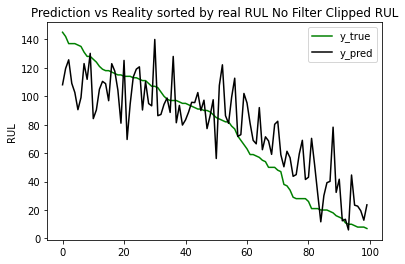

In [15]:
# plot prediction vs reality 2
d = {"units": range(1,101), "y_true": y_true, "y_pred": y_pred}
ev = pd.DataFrame(d)
ev = ev.sort_values(by = "y_true", ascending = False)
    
plt.plot(ev["y_true"].values, color = "g")
plt.plot(ev["y_pred"].values, color = "black")
plt.legend(["y_true", "y_pred"])
plt.ylabel("RUL")
plt.title("Prediction vs Reality sorted by real RUL No Filter Clipped RUL")
plt.savefig("plots\LR_None_clipped.png", bbox_inches = "tight")
plt.show()

#### Median filter

In [16]:
# prepare data
r = "clipped"
fi = "median"
y_train, X_train = prepare_train(train, fi, r, t=125)
X_test = prepare_test(test, "median") 
y_true = RUL["RUL"].values

# fit the model
lm = LinearRegression()
lm.fit(X_train, y_train)

# predict
y_pred = lm.predict(X_test)

# evaluate
MSE, RMSE, R2 = evaluate(y_true, y_pred)
new_row = {"Algo": "LR", "Filter": fi , "RUL_def": r, "MSE": MSE, "RMSE": RMSE, "R2": R2}
results = results.append(new_row, ignore_index=True)

MSE 551.452
RMSE 23.483
r2 score 0.681


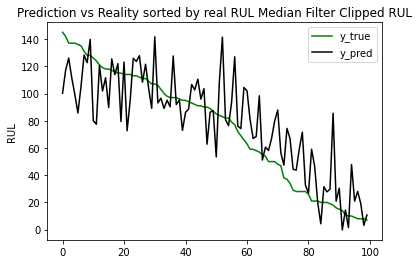

In [17]:
# plot prediction vs reality 2
d = {"units": range(1,101), "y_true": y_true, "y_pred": y_pred}
ev = pd.DataFrame(d)
ev = ev.sort_values(by = "y_true", ascending = False)
    
plt.plot(ev["y_true"].values, color = "g")
plt.plot(ev["y_pred"].values, color = "black")
plt.legend(["y_true", "y_pred"])
plt.ylabel("RUL")
plt.title("Prediction vs Reality sorted by real RUL Median Filter Clipped RUL")
plt.savefig("plots\LR_"+str(fi)+"_"+str(r)+".png", bbox_inches = "tight")
plt.show()

#### Kalman filter

In [18]:
# prepare data
r = "clipped"
fi = "kalman"
y_train, X_train = prepare_train(train, fi, r, t=125)
X_test = prepare_test(test, "kalman") 
y_true = RUL["RUL"].values

# fit the model
lm = LinearRegression()
lm.fit(X_train, y_train)

# predict
y_pred = lm.predict(X_test)

# evaluate
MSE, RMSE, R2 = evaluate(y_true, y_pred)
new_row = {"Algo": "LR", "Filter": fi , "RUL_def": r, "MSE": MSE, "RMSE": RMSE, "R2": R2}
results = results.append(new_row, ignore_index=True)

MSE 514.639
RMSE 22.686
r2 score 0.702


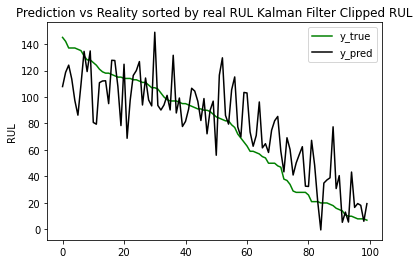

In [19]:
# plot prediction vs reality 2
d = {"units": range(1,101), "y_true": y_true, "y_pred": y_pred}
ev = pd.DataFrame(d)
ev = ev.sort_values(by = "y_true", ascending = False)
    
plt.plot(ev["y_true"].values, color = "g")
plt.plot(ev["y_pred"].values, color = "black")
plt.legend(["y_true", "y_pred"])
plt.ylabel("RUL")
plt.title("Prediction vs Reality sorted by real RUL Kalman Filter Clipped RUL")
plt.savefig("plots\LR_"+str(fi)+"_"+str(r)+".png", bbox_inches = "tight")
plt.show()

In [21]:
results.to_csv("results/results2_LR.csv", index=False) 